# Introduction
Llama is Meta's Open Source Large Langauge Model for performing Generative AI tasks and build Gen AI Applications.
# Llama 3.2
 The Llama 3.2 is the latest model version that incorporates the following features:

* Open-source
* *Lightweight text only*
* *Multimodal*
* *Multilingual*

The two largest models of the Llama 3.2 collection, 11B and 90B, support image reasoning use cases, such as document-level understanding including charts and graphs, captioning of images, and visual grounding tasks such as directionally pinpointing objects in images based on natural language descriptions. The 11B and 90B models can also bridge the gap between vision and language by extracting details from an image, understanding the scene, and then crafting a sentence or two that could be used as an image caption to help tell the story.

The lightweight 1B and 3B models are highly capable with multilingual text generation and tool calling abilities. These models empower developers to build personalized, on-device agentic applications with strong privacy where data never leaves the device.

Source: https://ai.meta.com/blog/llama-3-2-connect-2024-vision-edge-mobile-devices/

## Models

<!--  In September 2024 , Meta introduced the [Llama 3.2 language models](https://ai.meta.com/llama/) (Lightweight and Multimodal). -->


<!--Llama 3.2 is a collection of 8 large language models (LLMs) pretrained and fine-tuned in 1B and 3B sizes that are multilingual text only, and 11B and 90B sizes that take both text and image inputs and output text. The Llama instruction-tuned text only models are optimized for multilingual dialogue use cases, including agentic retrieval and summarization tasks. The Llama pretrained multimodal models can be adapted for a variety of image reasoning tasks, and instruction tuned multimodal models are optimized for visual recognition, image reasoning, captioning, and answering general questions about an image:-->

Llama 3.2 is a collection of 8 large language models (LLMs):

#### Pretrained & Instruct Models:
1. `llama-3.2-1b` (text only) - Lightweight, most cost-efficient pretrained 1 billion parameter model, you can run anywhere on mobile and on edge devices.
1. `llama-3.2-3b` (text only) - Lightweight, cost-efficient pretrained 3 billion parameter model, you can run anywhere on mobile and on edge devices.
1. `llama-3.2-11b` (text+image input; text output) - multimodal pretrained 11 billion parameter model
1. `llama-3.2-90b` (text+image input; text output) - multimodal pretrained 90 billion parameter model

#### Latest release - October 24th
We released quantized `1B` and `3B` models.

[Model Card](https://github.com/meta-llama/llama-models/blob/main/models/llama3_2/MODEL_CARD.md#instruction-tuned-models)

1. `llama-3.2-1b-QLORA_INT4_EO8`
1. `llama-3.2-3b-QLORA_INT4_EO8`
1. `llama-3.2-1b-SpinQuant_INT4_EO8`
1. `llama-3.2-3b-SpinQuant_INT4_EO8`

This project was part of the Meta hands-on workshop conducted by Varun Vonmitta at ODSC 2024.
LLM model: -Llama 3.2
The project uses Together.AI hosted API to use Llama 3.2.

## Setup
This section briefs on the technical setup required for the project.

## API Keys
1. Setup Together.ai and get an API key from the dashboard (https://www.together.ai/)
2. Setup Tavily account and get an API key from the dashboard (https://tavily.com/)

## Local Notebook Setup

In [ ]:
git clone git@github.com:varunfb/llama.git
cd llama
yes | conda create -n odsc python=3.10
conda install -c conda-forge jupyterlab
jupyter lab

In [ ]:
import sys
!{sys.executable} -m pip install together matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 1.4 MB/s eta 0:00:00


# Prompting Vision Models

Prompt engineering is using natural language to produce a desired response from a large language model (LLM).

In this section, we'll focus on Llama 3.2 11B and 90B Vision Instruct model for a multimodal application to build a Cooking Assistant using Llama 3.2.


Load Llama 3.2 model using Together.AI API.

In [ ]:
from together import Together
import os
import requests
import json

# Get a free API key from https://api.together.xyz/settings/api-keys
os.environ["TOGETHER_API_KEY"] = "" #ENTER API Key here. The API key redacted for security reasons.

def llama32(messages, model_size=11):
  model = f"meta-llama/Llama-3.2-{model_size}B-Vision-Instruct-Turbo"
  url = "https://api.together.xyz/v1/chat/completions"
  payload = {
    "model": model,
    "max_tokens": 4096,
    "temperature": 0.0,
    "stop": ["<|eot_id|>","<|eom_id|>"],
    "messages": messages
  }

  headers = {
    "Accept": "application/json",
    "Content-Type": "application/json",
    "Authorization": "Bearer " + os.environ["TOGETHER_API_KEY"]
  }
  res = json.loads(requests.request("POST", url, headers=headers, data=json.dumps(payload)).content)

  if 'error' in res:
    raise Exception(res['error'])

  return res['choices'][0]['message']['content']

## Cooking/Shopping Assistant
The following section illustrates usage of Llama 3.2 (accessed through API) to generate suggestions on meal plans based on what you have in your shoppping basket,  generate a shopping list based on the missing ingredients and finally we estimate calories for each of the suggested meal and calculate total calories.

The Llama 3.2 LLM is provided with an input image of a grocery basket containing ingredients required for cooking.

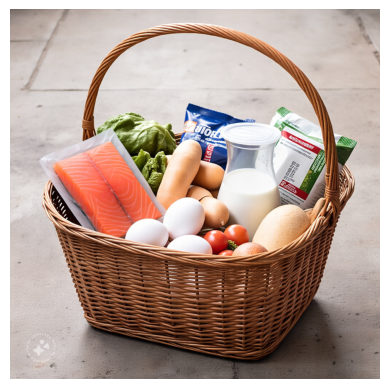

In [ ]:
display_local_image("/grocery_shopping_bascket_with_salmon_in_package.jpeg")
base64_image = encode_image("/grocery_shopping_bascket_with_salmon_in_package.jpeg")

### Identifying objects in shopping basket and build meal plan

Chain of Thought reasoning is used in the prompt provided to the LLM to perform the following tasks based on the input image of the grocery basket.



*   List the number of items you recognize in the shopping basket.
*   List the items in the shopping basket.
*   Give me a weekly meal plan using these items in basket.
*   If you are not confident of a certain item in the basket please list them in the end.



In [ ]:
messages = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "1. List the number of items you recognize in the shopping basket. 2. List the items in the shopping basket. 3. Double check your responses before finalizing step (2). 4. Give me a weekly meal plan using these items in basket. 5. If you are not confident of a certain item in the basket please list them in the end. "
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }
      }
    ]
  },
]

meal_plan_result = llama32(messages)
print(meal_plan_result)

**Step 1: List the number of items you recognize in the shopping basket.**

I recognize 9 items in the shopping basket.

**Step 2: List the items in the shopping basket.**

The items in the shopping basket are:

* Salmon fillets
* Eggs
* Tomatoes
* Cabbage
* Lettuce
* Milk
* Bread
* Butter
* Cheese

**Step 3: Double check your responses before finalizing step (2).**

After re-examining the image, I found that I missed one item. The correct list of items in the shopping basket is:

* Salmon fillets
* Eggs
* Tomatoes
* Cabbage
* Lettuce
* Milk
* Bread
* Butter
* Cheese
* Bag of chips

**Step 4: Give me a weekly meal plan using these items in basket.**

Here's a sample weekly meal plan using the items in the shopping basket:

Monday:

* Breakfast: Scrambled eggs with tomatoes and bread
* Lunch: Grilled salmon with cabbage and lettuce salad
* Dinner: Baked chicken with roasted vegetables (using the cabbage and lettuce)

Tuesday:

* Breakfast: Toast with butter and cheese
* Lunch: Egg salad

### Identify missing items and create shopping list

In [ ]:
messages = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "1. List the number of items you recognize in the shopping basket. 2. List the items in the shopping basket. 3. Double check your responses before finalizing step (2). 4. Give me a weekly meal plan using these items in basket."
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }
      }
    ]
  },
    {

      "role": "assistant",
    "content": [
      {
        "type": "text",
        "text": meal_plan_result
      }
    ]
  },{

      "role": "user",
    "content": [
      {
        "type": "text",
        "text": "List all of the ingredients and their quantities that you have used in my meal plan which is not already in my basket and create a shopping list for me!"
      },
    ]
  },
]

shopping_list_result = llama32(messages)
print(shopping_list_result)

To create a shopping list for the meal plan, we need to identify the ingredients that are not already in the basket. 

The meal plan includes the following ingredients that are not in the basket:

* Chicken (for Monday, Wednesday, Thursday, Friday, and Sunday)
* Vegetable oil (for cooking)
* Salt (for seasoning)
* Pepper (for seasoning)
* Garlic (for seasoning)
* Onion (for seasoning)
* Caesar dressing (for Wednesday's lunch)
* Tomato soup (for Tuesday's dinner)
* Wraps (for Thursday's lunch)
* Caesar salad dressing (for Wednesday's lunch)

Here is the shopping list for the ingredients that are not already in the basket:

* Chicken (4-5 lbs)
* Vegetable oil
* Salt
* Pepper
* Garlic
* Onion
* Caesar dressing
* Tomato soup
* Wraps
* Caesar salad dressing

Please note that the quantities of the ingredients may vary depending on your personal preferences and the number of people you are planning to cook for.


### Calculate calories for the meals

For context addition, the model's previous presponse is added to the prompt for the next task. This helps add context to the prompt for better context based reuslts.

The next task prompted to Llama 3.2 is to find number of calories using in context user-agent prompt and responses.

In [ ]:
messages = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Give me weekly plan for meals using what I have in my shopping basket "
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }
      }
    ]
  },
    {

      "role": "assistant",
    "content": [
      {
        "type": "text",
        "text": meal_plan_result
      }
    ]
  },{

      "role": "user",
    "content": [
      {
        "type": "text",
        "text": "List all of the ingredients and their quantities that you have used in my meal plan which is not already in my basket annd create a shopping list for me!"

      },
    ]
  },
    {

      "role": "assistant",
    "content": [
      {
        "type": "text",
        "text": shopping_list_result
      }
    ]
  },
        {

      "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Calculate the calories for each of the recipes in my meal plan and also my weekly total calories."
      }
    ]
  },
]

calorie_count_result = llama32(messages)
print(calorie_count_result)

To calculate the calories for each recipe and the weekly total calories, we need to estimate the calorie content of each ingredient based on its weight and nutritional value. 

Here are the estimated calorie counts for each recipe:

**Monday**

* Scrambled eggs with tomatoes and bread: 350 calories
* Grilled salmon with cabbage and lettuce salad: 400 calories
* Baked chicken with roasted vegetables: 500 calories

Total calories for Monday: 1250 calories

**Tuesday**

* Toast with butter and cheese: 300 calories
* Egg salad sandwich with bread: 400 calories
* Grilled cheese sandwich with tomato soup: 600 calories

Total calories for Tuesday: 1300 calories

**Wednesday**

* Omelette with tomatoes and cheese: 350 calories
* Chicken Caesar salad: 550 calories
* Baked salmon with roasted vegetables: 400 calories

Total calories for Wednesday: 1300 calories

**Thursday**

* Scrambled eggs with bread: 300 calories
* Chicken and cheese wrap: 500 calories
* Baked chicken with roasted vegetables

### Final Task - How to cook instructions

Prompt the LLM to generate cooking instructions based on the identified ingredients and meal plans.

In [ ]:
messages = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Give me weekly plan for meals using what I have in my shopping basket "
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }
      }
    ]
  },
    {

      "role": "assistant",
    "content": [
      {
        "type": "text",
        "text": meal_plan_result
      }
    ]
  },{

      "role": "user",
    "content": [
      {
        "type": "text",
        "text": "List all of the ingredients and their quantities that you have used in my meal plan which is not already in my basket annd create a shopping list for me!"

      },
    ]
  },
    {

      "role": "assistant",
    "content": [
      {
        "type": "text",
        "text": shopping_list_result
      }
    ]
  },
    {

      "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Calculate the calories for each of the recipes in my meal plan and also my weekly total calories."
      }
    ]
  },
  {

      "role": "assistant",
    "content": [
      {
        "type": "text",
        "text": calorie_count_result
      }
    ]
  },
   {

      "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Can you give me step by step instruction to one of the breakfast items?"
      }
    ]
  },
]

result = llama32(messages)
print(result)

Here is a step-by-step guide to making scrambled eggs with tomatoes and bread:

**Ingredients:**

* 2 eggs
* 1 tomato, diced
* 2 slices of bread
* Salt and pepper to taste
* Butter or oil for cooking

**Instructions:**

1. Crack the eggs into a bowl and whisk them together with a fork. Add a pinch of salt and pepper to taste.
2. Heat a non-stick pan over medium heat and add a small amount of butter or oil.
3. Once the butter has melted or the oil is hot, pour in the egg mixture.
4. Let the eggs cook for about 30 seconds, until the edges start to set.
5. Use a spatula to gently scramble the eggs, breaking them up into small curds.
6. Continue cooking the eggs for another 30-60 seconds, until they are cooked through but still moist.
7. While the eggs are cooking, toast the bread slices until they are lightly browned.
8. Once the eggs are done, remove them from the heat and set them aside.
9. Add the diced tomato to the pan and cook for about 1 minute, until it starts to soften.
10. To se